# psuedo-$C_l$

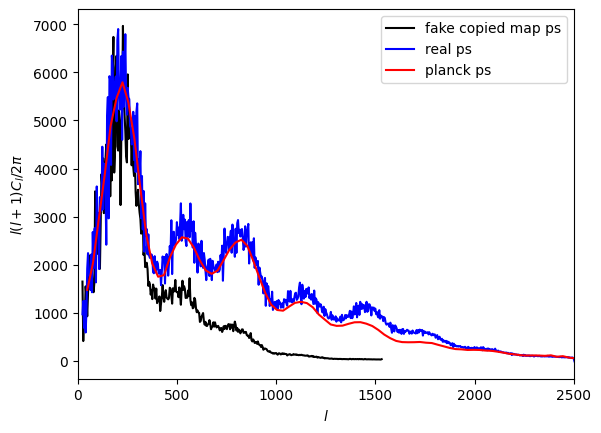

In [4]:
import numpy as np
import matplotlib.pyplot as plt

ell_cl = np.loadtxt('./output/copied_psuedo_cl.txt')
r_ell_cl = np.loadtxt('./output/psuedo_cl.txt') # real map
p_ell_dl = np.loadtxt('./output/planck_powerspec.txt') # planck map


fig, ax = plt.subplots()
first_l = 5

ell     = ell_cl[first_l:, 0]
r_ell   = r_ell_cl[first_l:, 0]

Cl      = ell_cl[first_l:, 1]
r_Cl    = r_ell_cl[first_l:, 1]

Dl      = ell * (ell + 1) * Cl / 2 / np.pi
r_Dl    = r_ell * (r_ell + 1) * r_Cl / 2 / np.pi
# ax.set_xscale('log')
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$l (l+1) C_l / 2 \pi$')
ax.plot(ell, Dl, '-k')
ax.plot(r_ell, r_Dl, '-b')
ax.plot(p_ell_dl[:,0], p_ell_dl[:,1], '-r')
ax.set_xlim(0, 2500)
# print(f"ell: \n{ell[:-1]}")
ax.legend(['fake copied map ps', 'real ps', 'planck ps'])

# Simulations' modulated $a_l$

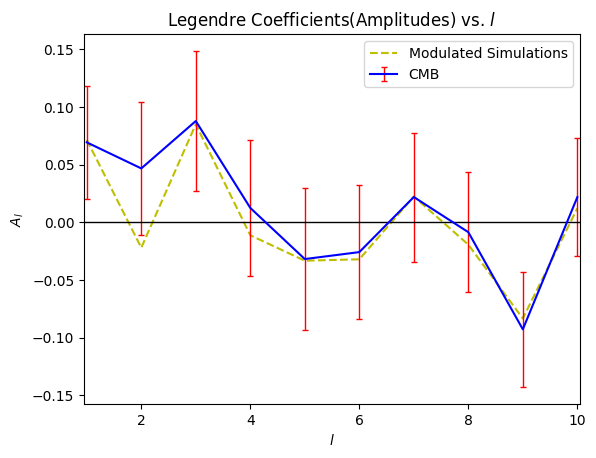

In [12]:
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
import os

cmb_a_l     = np.loadtxt('./output/cmb_a_l.txt')
sims_a_l    = np.loadtxt('./output/sims_a_l.txt')
max_l       = len(cmb_a_l) - 1

fig, ax     = plt.subplots()

avg_sims_result = np.mean(sims_a_l, axis=0)[1:]
std_sims_result = np.std(sims_a_l, axis=0)[1:]
l_coeff         = np.arange(max_l + 1)[1:]

# simulation values with modulation applied
ax.plot(l_coeff, avg_sims_result, 'y--')

# cmb with errorbars taken from simulations
ax.errorbar(l_coeff, cmb_a_l[1:], std_sims_result,
             color="b", ecolor='red', elinewidth=1,
             capsize = 2)

ax.legend(['Simulations(Modulated Values)', 'CMB'])

# csfont = {'fontname':'CMU Sans Serif'}
# hfont = {'fontname':'Helvetica'}

margin = 0.05
ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$A_l$')
ax.set_xlim((1 - margin, max_l + margin))
ax.set_title('Legendre Coefficients(Amplitudes) vs. '+ r'$l$')
fig.savefig('./output/a_l_sims_modulated' + ".pdf", transparent=True)

# simulations' internal $a_l$

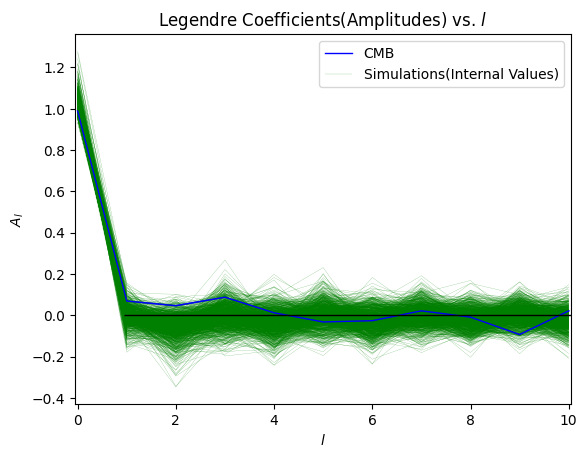

In [40]:
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
import os

cmb_a_l     = np.loadtxt('./output/cmb_a_l.txt')
sims_a_l    = np.loadtxt('./output/sims_internal_a_l.txt')
max_l       = len(cmb_a_l) - 1

fig, ax     = plt.subplots()

avg_sims_result = np.mean(sims_a_l, axis=0)[1:]
std_sims_result = np.std(sims_a_l, axis=0)[1:]
l_coeff         = np.arange(max_l + 1)#[1:]

# cmb with errorbars taken from simulations
ax.plot(l_coeff, cmb_a_l, '-b', linewidth=1)

# ax.errorbar(l_coeff, cmb_a_l[1:], std_sims_result,
#              color="b", ecolor='red', elinewidth=1,
#              capsize = 2)

# simulation values with modulation applied
for i in range(len(sims_a_l)):
    ax.plot(l_coeff, sims_a_l[i] / 80, '-g', linewidth = .1)

ax.plot(l_coeff, cmb_a_l, '-b', linewidth=1)

ax.legend(['CMB', 'Simulations(Internal Values)'])

# csfont = {'fontname':'CMU Sans Serif'}
# hfont = {'fontname':'Helvetica'}

margin = 0.05
ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$A_l$')
ax.set_xlim((0 - margin, max_l + margin))
ax.set_title('Legendre Coefficients(Amplitudes) vs. '+ r'$l$')
fig.savefig('./output/a_l_sims_internal' + ".pdf", transparent=True)